$\underline{Runge-Kutta\hspace{0.2cm} 2^{nd} \hspace{0.2cm}order}$

We always trying to break (divide) an equation of n order into n equations of first order.

Lets advance to the middle step (with velocity verlet) and then let's think where to go, once we know which steps to take (from the middle), we're going to go back to the beginning and definitely take the first step (again, but now definitely).

In a general form:

$\frac{df}{dt} = g(f(t),t)$

$f(t + \Delta t/2) = f(t) + g(f(t),t)\Delta t/2$

$f(t + \Delta t) = f(t) + g(f(t + \Delta t/2),t + \Delta t/2)\Delta t$

And so on...



In the general form, with more derivatives:

$f(t + \Delta t/2) = f(t) + f'(t)\Delta t/2$

$f'(t+\Delta t/2) = f'(t) + f''(f(t))\Delta t/2$

$f''(t+\Delta t/2) = f''(t) + f'''(f(t))\Delta t/2$

Calculating the forward step now:

$f(t + \Delta t) = f(t) + f'(t+\Delta t/2)\Delta t$

$f'(t + \Delta t) = f'(t) + f''(f(t+\Delta t/2))\Delta t$

$f''(t+\Delta t) = f''(t) + f'''(f(t+\Delta t/2))\Delta t$

and so on for more derivatives etc.

Using the same method with Newton's equation:

$x(t + \Delta t/2) = x(t) + v(t)\Delta t/2$

$v(t+\Delta t/2) = v(t) + a(x(t))\Delta t/2$

$x(t + \Delta t) = x(t) + v(t+\Delta t/2)\Delta t$

$v(t + \Delta t) = v(t) + a(x(t+\Delta t/2))\Delta t$

If there were more derivatives:

$f(t + \Delta t/2) = f(t) + f'(t)\Delta t/2$

$f(t + \Delta t) = f(t) + f'(t+\Delta t/2)\Delta t$


Applying to an equation of a first order derivative (example of radioactive decay):

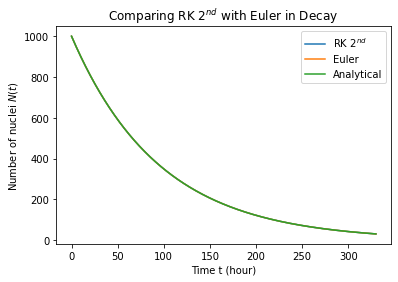

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#                  2nd Order RUNGE-KUTTA IN RADIOACTIVE DECAY comparing with Euler 

n = 1000 # Number of nucleus. 
n1 = n # n in t + dt/2.
n2 = 0 # n in t + dt, is the step right after t + dt/2.
t,dt = 0,0.0005 # Total time and the step/time interval.
t1 = 66 # tau 1, half life time.
lam1 = np.log(2)/t1 # lambda 1, decay rate.
n1n,n1a = n,n # Values of n1 for Explicit Euler's method and analytical. 
n10 = 0 # An auxiliary variable for n1, will keep its value but its not your name because this name will already used for
# another calculation, its value will be changed (of n1).

# Lists:
list_1 = [n1n]
list_2 = [n1] # Here we put n1 and not n2 because n2 isn't calculated yet, but we cannot put 0 cause n2 now has the total number of nuclei.
list_3 = [n1a]
list_t = [t]

while t < 5 * t1: 
  
  # RK2 method: 
  n10 = n1 # To update the value of the auxiliary variable n10.
  n1 = n1 + (-lam1 * n1) * dt/2 # n(t + dt/2) = n(t) + n'(t) * dt/2; it's like x(t + dt/2) in the example of Newton's equations.
  n2 = n10 + (-lam1 * n1)*dt # n(t + dt) = n(t) + n'(t + dt/2)
  list_2.append(n2)

  # Comparing with Euler:
  n1n = n1n * (1 - lam1 * dt) # Numerical solution of N1(t) with explicit Euler.
  list_1.append(n1n)

  n1a = n * np.exp(-lam1 * t) # Analytical solution of N1(t), will be used t (not dt) and initial n1, as we already used n10 in the code,
  # we use the n which has the initial value too.
  list_3.append(n1a)

  n1 = n2 # updating the value of n1.
  
  t = t + dt
  list_t.append(t)

plt.plot(list_t,list_2)
plt.plot(list_t,list_1)
plt.plot(list_t,list_3)
plt.title('Comparing RK $2^{nd}$ with Euler in Decay ')
plt.legend(['RK $2^{nd}$','Euler','Analytical'])
plt.xlabel('Time t (hour)')
plt.ylabel('Number of nuclei $N(t)$')
plt.show()

Applying to an equation of a second order derivative (example of elastic force, the second is the acceleration):

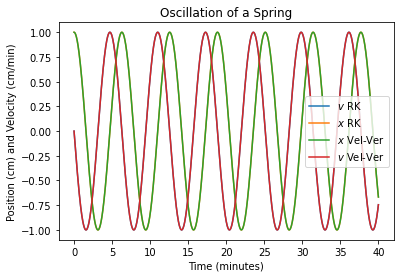

In [1]:
import numpy as np
import matplotlib.pyplot as plt

v1 = 0 # Initial velocity v0.
x1 = 1 # Initial position x0, in centimeters.
dt,t,tf = 0.0005,0,40 # Time interval, step in which time passes (interval between t1 and t2), initial time, final time, in minutes.
m = 1 # Spring mass.
k = m # Spring constant.   
w = np.sqrt(k/m) # k/m = w^2 = 1 Angular frequency.        
# E = (m * v**2)/2 + (k * x1**2)/2 # Mechanical energy = Kinetic energy + Potential energy (Elastic, in this case).
x2,v2,vaux = 0,0,0
x3,v3 = 1,0 # for comparison purposes with RK.


# Lists:
list_t = [t]
list_x = [x1]
list_v = [v1]
# list_e = [E]
list_x3 = [x3]
list_v3 = [v3]

def a(x):
  a = -(w**2) * x 
  return a 

while t < tf: 
  
  # RK2 method:
  xaux = x1
  vaux = v1
  x1 = x1 + v1 * dt/2 # x(t + dt/2) = x(t) + v(t) * dt/2
  v1 = v1 + a(xaux) * dt/2 # v(t + dt/2) = v(t) + a(x(t)) * dt/2

  x2 = xaux + v1 * dt # x(t + dt) = x(t) + v(t + dt/2) + dt
  list_x.append(x2)


  v2 = vaux + a(x1) * dt # v(t + dt) = v(t) + a(x(t + dt/2)) + dt
  list_v.append(v2)
  
  v1 = v2 # Passing the value forward.
  x1 = x2 # Passing the value forward.

  # Velocity-Verlet method:
  v3 = v3 + a(x3) * dt/2 

  x3 = x3 + v3 * dt
  list_x3.append(x3)
  
  v3 = v3 + a(x3) * dt/2 
  list_v3.append(v3)

  t = t + dt 
  list_t.append(t)


plt.plot(list_t,list_v)
plt.plot(list_t,list_x)
plt.plot(list_t,list_x3)
plt.plot(list_t,list_v3)
plt.title('Oscillation of a Spring')
plt.legend(['$v$ RK','$x$ RK','$x$ Vel-Ver','$v$ Vel-Ver'])
plt.xlabel('Time (minutes)')
plt.ylabel('Position (cm) and Velocity (cm/min)')
plt.show()